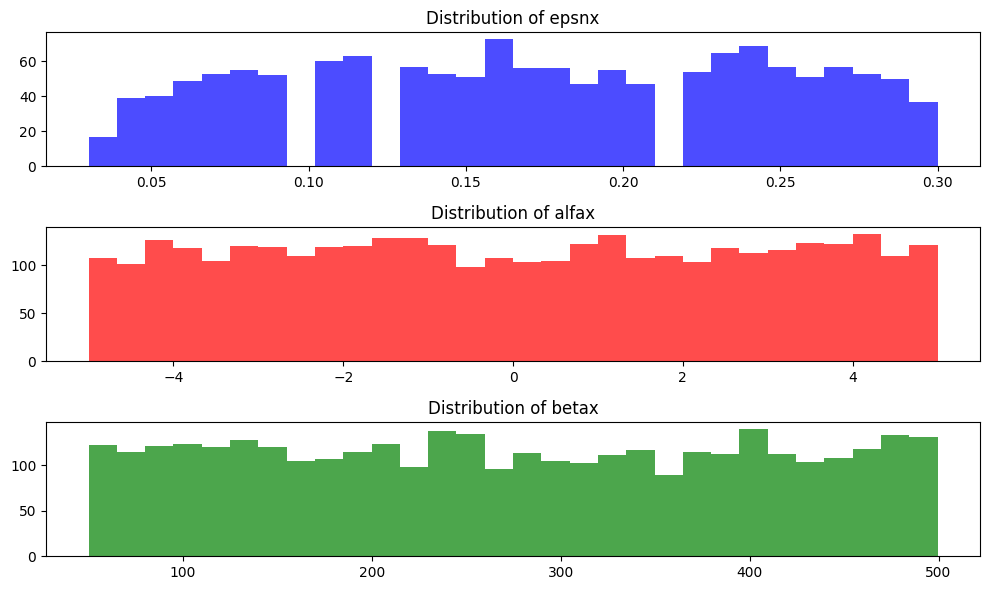

In [8]:
import mysql.connector
import re
import matplotlib.pyplot as plt

# Define regex pattern
pattern = r"epsnx(-?[\d.]+)_alfax(-?[\d.]+)_betax(-?[\d.]+)_epsny(-?[\d.]+)_alfay(-?[\d.]+)_betay(-?[\d.]+)_epsnz(-?[\d.]+)_alfaz(-?[\d.]+)_betaz(-?[\d.]+)"

# Connect to the MySQL server
conn = mysql.connector.connect(
    host='srv395.hstgr.io',
    port='3306',
    user='u641848469_iank',
    password='VPCBwkO68!!nCOXa2Yv4',
    database='u641848469_argonneimages',
    connect_timeout=600  # Set connection timeout to 10 minutes
)

# Create a cursor
cursor = conn.cursor()

# Execute query to fetch filenames
cursor.execute("SELECT filename FROM filenames")

# Fetch filenames
filenames = cursor.fetchall()

# List to store parameters
epsnx_values = []
alfax_values = []
betax_values = []

# Iterate over each filename
for filename in filenames:
    # Apply regex pattern
    match = re.match(pattern, filename[0])
    if match:
        # If match is found, store parameters
        epsnx, alfax, betax, _, _, _, _, _, _ = map(float, match.groups())
        if epsnx != 0.10:
            epsnx_values.append(epsnx)
        alfax_values.append(alfax)
        betax_values.append(betax)

# Close connection
conn.close()

# Now, we can plot the distribution of the parameters
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(epsnx_values, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of epsnx')

plt.subplot(3,1,2)
plt.hist(alfax_values, bins=30, color='red', alpha=0.7)
plt.title('Distribution of alfax')

plt.subplot(3,1,3)
plt.hist(betax_values, bins=30, color='green', alpha=0.7)
plt.title('Distribution of betax')

plt.tight_layout()
plt.show()


In [1]:
import os
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
)

# Create a cursor
cursor = cnx.cursor()

# Specify the folder path
folder_path = 'E://data/'

# Get a list of subfolder names in the folder
subfolders = next(os.walk(folder_path))[1]

# Check if every subfolder name exists in the database
for subfolder in subfolders:
    query = "SELECT filename FROM filenames WHERE filename = %s"
    cursor.execute(query, (subfolder,))
    result = cursor.fetchone()
    if result:
        pass
    else:
        print(f"Subfolder '{subfolder}' does not exist in the database")
        insert_query = "INSERT INTO filenames (filename) VALUES (%s)"
        cursor.execute(insert_query, (subfolder,))
        cnx.commit()

# Close the cursor and connection
cursor.close()
cnx.close()


In [2]:
import os
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
        host='srv395.hstgr.io',
        port='3306',
        user='u641848469_iank',
        password='VPCBwkO68!!nCOXa2Yv4',
        database='u641848469_argonneimages',
)

# Create a cursor
cursor = cnx.cursor()

# Specify the folder path
folder_path = 'E://data/'

# Get a list of subfolder names in the folder
subfolders = next(os.walk(folder_path))[1]

# Retrieve all rows from the database table
query = "SELECT filename FROM filenames"
cursor.execute(query)
rows = cursor.fetchall()

# Check if each row in the database exists as a subfolder
for row in rows:
    filename = row[0]
    if filename in subfolders:
        pass
    else:
        delete_query = "DELETE FROM filenames WHERE filename = %s"
        cursor.execute(delete_query, (filename,))
        cnx.commit()
        print(f"Deleted row with filename '{filename}' from the database")


# Close the cursor and connection
cursor.close()
cnx.close()


In [3]:
import os

# Define the directory to start from
root_dir = "E://data/"

# Walk through all directories and files in the root directory
for dir_name, sub_dir_list, file_list in os.walk(root_dir):
    for file_name in file_list:
        # If the file is 'coord.out', check its size
        if file_name == 'coord.out':
            file_path = os.path.join(dir_name, file_name)
            file_size_MB = os.path.getsize(file_path) / (1024 * 1024)  # Convert to megabytes
            if file_size_MB < 50:
                print(f'File "{file_path}" is smaller than 50MB.')


In [3]:
import os
import re

# Root directory
root_dir = 'E://data/'  # Replace with your root directory

# Iterate over all subdirectories in the root directory
for dir_name in os.listdir(root_dir):
    dir_path = os.path.join(root_dir, dir_name)
    # Check if it's a directory and contains track.dat
    if os.path.isdir(dir_path) and 'track.dat' in os.listdir(dir_path):
        track_file = os.path.join(dir_path, 'track.dat')
        with open(track_file, 'r') as file:
            lines = file.readlines()
        parameter_lines = lines[14:17]

        # Store parameters
        parameters = {}
        for line in parameter_lines:
            # Split line at ',' and process each part
            for part in line.split(','):
                part = part.strip()  # Remove leading/trailing whitespaces
                if '=' in part and 'd0' in part:  # Check for parameter assignment
                    param_name, param_value = part.split('=')[0], part.split('=')[1].replace('d0', '')
                    # Convert parameter value to float and round to 4 decimal places
                    param_value = round(float(param_value), 5)
                    # Store parameter and its value
                    parameters[param_name] = param_value
        
        # Construct new directory name
        new_dir_name = "_".join([f"{k}{v}" for k, v in parameters.items()])
        new_dir_path = os.path.join(root_dir, new_dir_name)

        # Rename directory
        os.rename(dir_path, new_dir_path)


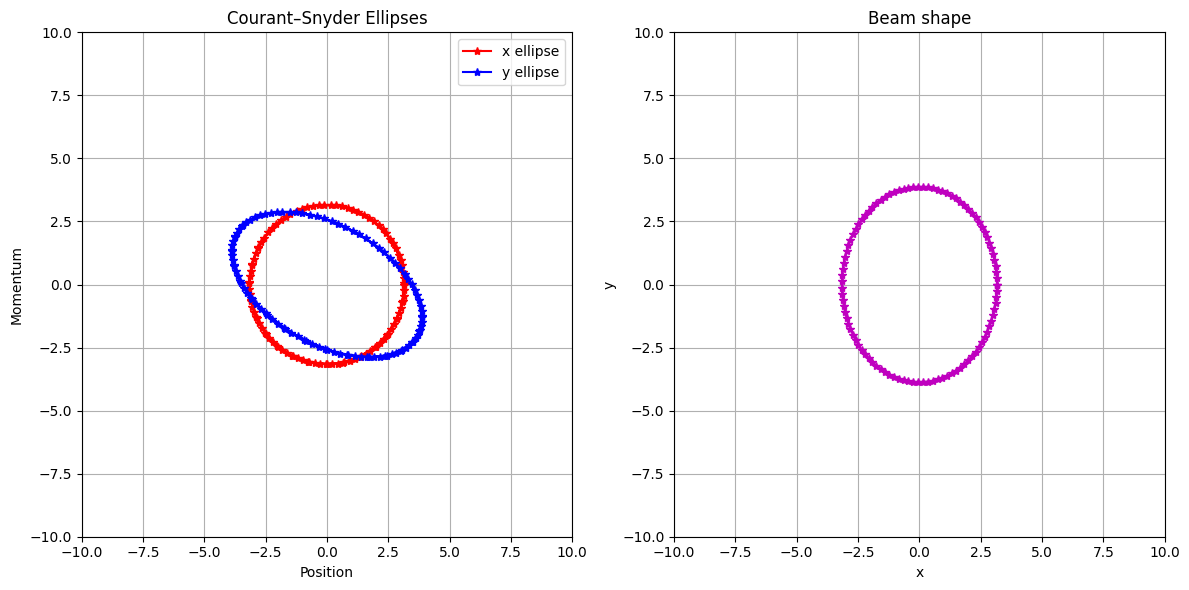

In [54]:
# https://indico.cern.ch/event/528094/contributions/2213316/attachments/1322590/1984069/L3-4-5_-_Transverse_Beam_Dynamics.pdf
import numpy as np
import matplotlib.pyplot as plt

# CS Parameters
alfa_x = 0
beta_x = 1
gamma_x = (1 + alfa_x**2) / beta_x
eps_x = 10

alfa_y = 0.5
beta_y = 1.5
gamma_y = (1 + alfa_y**2) / beta_y
eps_y = 10

npoints = 100
rad = np.pi / 180

thdeg = np.arange(0, npoints) * 13
teta = thdeg * rad
x = np.sqrt(eps_x * beta_x) * np.cos(teta)
xp = -np.sqrt(eps_x / beta_x) * (alfa_x * np.cos(teta) + np.sin(teta))
y = np.sqrt(eps_y * beta_y) * np.cos(teta)
yp = -np.sqrt(eps_y / beta_y) * (alfa_y * np.cos(teta) + np.sin(teta))

x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)

# (x - h)²/a² + (y - k)²/b² = 1
# (h, k) is the center of the ellipse
# a is the semi-axis length along the x-axis
# b is the semi-axis length along the y-axis
h = (x_max + x_min) / 2
k = (y_max + y_min) / 2
a = (x_max - x_min) / 2
b = (y_max - y_min) / 2
thdeg = np.linspace(0, 360, npoints)
teta = thdeg * rad
x_final = a * np.cos(teta) + h
y_final = b * np.sin(teta) + k

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid(True)
plt.xlim([-10, 10])  
plt.ylim([-10, 10])
plt.plot(x, xp, '-r*', label='x ellipse')
plt.plot(y, yp, '-b*', label='y ellipse')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Courant–Snyder Ellipses')

plt.subplot(1,2,2)
plt.grid(True)
plt.plot(x_final, y_final, '-m*')
plt.xlim([-10, 10])  
plt.ylim([-10, 10])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Beam shape')

plt.tight_layout() # Adjusts the spacing between the subplots
plt.show()